In [ ]:
import pandas as pd
import numpy as np
import edhec_risk_ph as erk
%load_ext autoreload
%autoreload 2
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind['1996':'2000'], 12)
cov = ind['1996':'2000'].cov() * 12

In [3]:
from scipy.optimize import minimize

In [27]:
def plot_ef(n_points, er, cov, style='.-'):
    """
    Plots the N-asset efficient frontier.

    Parameters
    ----------
    n_points : int
        Number of points to plot on the efficient frontier.
    er : pd.Series
        Expected returns for the N assets.
    cov : pd.DataFrame
        Covariance matrix for the N assets.
    style : str, optional
        Matplotlib style string for the plot (default is '.-').

    Returns
    -------
    None
    """
    weights = [np.array([w, 1 - w]) for w in np.linspace(0, 1, n_points)]
    rets = [portfolio_return(w, er) for w in weights]
    vols = [portfolio_vol(w, cov) for w in weights]

    import matplotlib.pyplot as plt
    plt.plot(vols, rets, style)
    plt.xlabel("Volatility")
    plt.ylabel("Return")

In [16]:
def minimize_vol(target_return, er, cov):
    n = er.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    return_is_target = {'type': 'eq',
                        'args': (er,),
                        'fun': lambda weights, er: target_return - erk.portfolio_return(weights, er)}
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1}
    results = minimize(erk.portfolio_vol, init_guess,
                       args=(cov,), method='SLSQP',
                       options={'disp': False},
                       constraints=(return_is_target,
                                    weights_sum_to_1),
                       bounds=bounds)
    return results.x

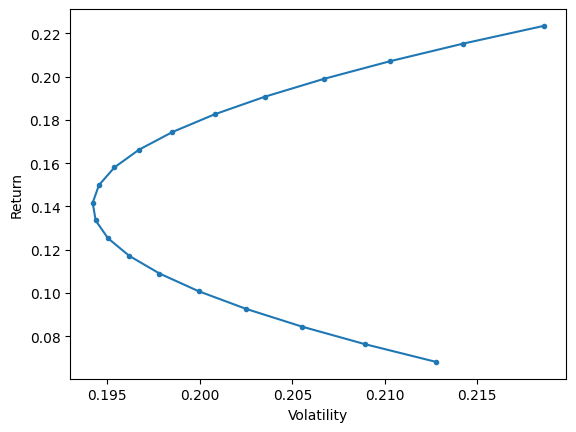

In [8]:
l = ["Games","Fin"]
erk.plot_ef(20, er[l], cov.loc[l,l])

In [6]:
w15 = erk.minimize_vol(0.15, er[l], cov.loc[l,l])
w15

array([0.47287631, 0.52712369])

In [7]:
vol15 = erk.portfolio_vol(w15, cov.loc[l,l])
ret15 = erk.portfolio_return(w15, er[l])
vol15, ret15

(np.float64(0.19455665790383514), np.float64(0.15000000000209263))

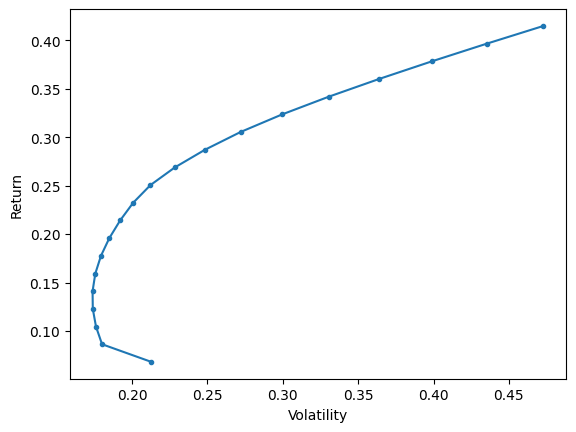

In [9]:
l = ["Smoke","Fin","Games","Coal"]
erk.plot_ef(20, er[l], cov.loc[l,l])